In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Activation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 15328777131099376717]

In [4]:
df = pd.read_csv('data/005930.KS.csv')
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1221,2021-03-31,82400,82700,81400,81400,81400.0,17240518
1222,2021-04-01,82500,83000,82000,82900,82900.0,18676461
1223,2021-04-02,84000,85200,83900,84800,84800.0,22997538
1224,2021-04-05,85800,86000,84800,85400,85400.0,16255990
1225,2021-04-06,86200,86200,85100,85700,85700.0,13430458


In [5]:
# 종가 기준으로 구하기
prices = df['Close'].values

In [6]:
prices[-50:]

array([86800, 89400, 86700, 85600, 83700, 82000, 83000, 84400, 84600,
       82500, 83500, 83000, 82700, 81600, 84200, 84900, 83200, 82100,
       82600, 82200, 82000, 82000, 85300, 82500, 83600, 84000, 82400,
       82100, 82000, 81400, 80900, 82000, 82800, 81800, 82800, 82300,
       82900, 81900, 82000, 81800, 81000, 81200, 81500, 81600, 82200,
       81400, 82900, 84800, 85400, 85700], dtype=int64)

In [7]:
# 최근 50일을 기준으로 다음날 가격을 예측을 위한 슬라이싱
seq_len = 50
squence_length = seq_len + 1
result = []
for i in range(len(prices) - squence_length):
    print(i)
    print(prices[i: i + squence_length])
    result.append(prices[i: i + squence_length])
result

0
[25700 25380 24920 25320 25500 26000 26000 25980 25760 25980 25880 25600
 25620 25920 26000 25300 24900 25000 25220 25800 25980 25920 25840 25620
 25060 24960 25280 25360 25400 25380 25720 25420 25900 25920 25640 25600
 25840 26660 27300 27540 27960 28120 28600 28120 27420 27600 28260 28180
 28520 28620 28960]
1
[25380 24920 25320 25500 26000 26000 25980 25760 25980 25880 25600 25620
 25920 26000 25300 24900 25000 25220 25800 25980 25920 25840 25620 25060
 24960 25280 25360 25400 25380 25720 25420 25900 25920 25640 25600 25840
 26660 27300 27540 27960 28120 28600 28120 27420 27600 28260 28180 28520
 28620 28960 28900]
2
[24920 25320 25500 26000 26000 25980 25760 25980 25880 25600 25620 25920
 26000 25300 24900 25000 25220 25800 25980 25920 25840 25620 25060 24960
 25280 25360 25400 25380 25720 25420 25900 25920 25640 25600 25840 26660
 27300 27540 27960 28120 28600 28120 27420 27600 28260 28180 28520 28620
 28960 28900 28600]
3
[25320 25500 26000 26000 25980 25760 25980 25880 25600 2

 49950 48900 47300]
916
[55500 55800 56800 58600 59500 60000 60000 59000 60700 61300 62400 61400
 62300 60800 58800 59100 57200 56400 57200 58900 59500 61100 60400 59700
 59900 60500 60700 61800 61500 59800 60200 60000 59200 56800 57900 56500
 55900 54200 55000 55400 57400 57800 56500 56500 54600 52100 52100 49950
 48900 47300 45600]
917
[55800 56800 58600 59500 60000 60000 59000 60700 61300 62400 61400 62300
 60800 58800 59100 57200 56400 57200 58900 59500 61100 60400 59700 59900
 60500 60700 61800 61500 59800 60200 60000 59200 56800 57900 56500 55900
 54200 55000 55400 57400 57800 56500 56500 54600 52100 52100 49950 48900
 47300 45600 42950]
918
[56800 58600 59500 60000 60000 59000 60700 61300 62400 61400 62300 60800
 58800 59100 57200 56400 57200 58900 59500 61100 60400 59700 59900 60500
 60700 61800 61500 59800 60200 60000 59200 56800 57900 56500 55900 54200
 55000 55400 57400 57800 56500 56500 54600 52100 52100 49950 48900 47300
 45600 42950 45400]
919
[58600 59500 60000 60000 590

[array([25700, 25380, 24920, 25320, 25500, 26000, 26000, 25980, 25760,
        25980, 25880, 25600, 25620, 25920, 26000, 25300, 24900, 25000,
        25220, 25800, 25980, 25920, 25840, 25620, 25060, 24960, 25280,
        25360, 25400, 25380, 25720, 25420, 25900, 25920, 25640, 25600,
        25840, 26660, 27300, 27540, 27960, 28120, 28600, 28120, 27420,
        27600, 28260, 28180, 28520, 28620, 28960], dtype=int64),
 array([25380, 24920, 25320, 25500, 26000, 26000, 25980, 25760, 25980,
        25880, 25600, 25620, 25920, 26000, 25300, 24900, 25000, 25220,
        25800, 25980, 25920, 25840, 25620, 25060, 24960, 25280, 25360,
        25400, 25380, 25720, 25420, 25900, 25920, 25640, 25600, 25840,
        26660, 27300, 27540, 27960, 28120, 28600, 28120, 27420, 27600,
        28260, 28180, 28520, 28620, 28960, 28900], dtype=int64),
 array([24920, 25320, 25500, 26000, 26000, 25980, 25760, 25980, 25880,
        25600, 25620, 25920, 26000, 25300, 24900, 25000, 25220, 25800,
        25980, 259

In [8]:
# 정규화
normalized_data = []
for window in result:
    normalized_window = [((float(p)/float(window[0])) -1 ) for p in window]   
    normalized_data.append(normalized_window)
result = np.array(normalized_data)

In [9]:
#data split
row = int(round(result.shape[0]*0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((1058, 50, 1), (117, 50, 1))

In [20]:
# LSTM  모델구현

model = Sequential()

model.add(LSTM(50,return_sequences=True, input_shape=(50,1)))

model.add(LSTM(64,return_sequences=False))

model.add(Dense(32,activation='relu'))

model.add(Dense(1,activation='linear'))

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 41,953
Trainable params: 41,953
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Early Stopping
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10, verbose=1)

In [21]:
history = model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          batch_size=10, epochs=100, callbacks=es)

Epoch 1/100
106/106 [==============================] - 6s 24ms/step - loss: 0.0025 - mae: 0.0381 - val_loss: 0.0050 - val_mae: 0.0542
Epoch 2/100
106/106 [==============================] - 2s 17ms/step - loss: 9.9810e-04 - mae: 0.0251 - val_loss: 0.0031 - val_mae: 0.0394
Epoch 3/100
106/106 [==============================] - 2s 16ms/step - loss: 8.7305e-04 - mae: 0.0233 - val_loss: 0.0015 - val_mae: 0.0319
Epoch 4/100
106/106 [==============================] - 2s 17ms/step - loss: 7.2582e-04 - mae: 0.0207 - val_loss: 0.0029 - val_mae: 0.0368
Epoch 5/100
106/106 [==============================] - 2s 17ms/step - loss: 5.5759e-04 - mae: 0.0186 - val_loss: 0.0014 - val_mae: 0.0273
Epoch 6/100
106/106 [==============================] - 2s 17ms/step - loss: 5.0401e-04 - mae: 0.0176 - val_loss: 0.0014 - val_mae: 0.0251
Epoch 7/100
106/106 [==============================] - 2s 17ms/step - loss: 4.5137e-04 - mae: 0.0165 - val_loss: 0.0012 - val_mae: 0.0236
Epoch 8/100
106/106 [=================

In [13]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 7ms/step - loss: 7.6485e-04 - mae: 0.0195


[0.0007648468599654734, 0.019496573135256767]

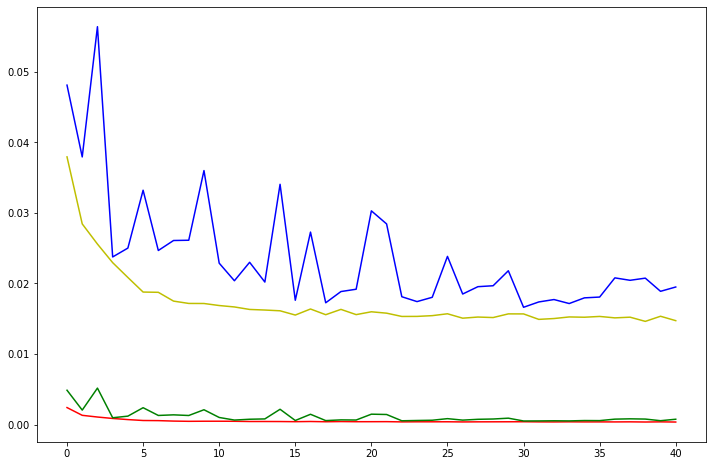

In [14]:
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'], c='r')
plt.plot(history.history['val_loss'], c='g')
plt.plot(history.history['mae'], c='y' )
plt.plot(history.history['val_mae'], c='b')
plt.show()

In [15]:
pred = model.predict(x_test)
pred

array([[ 0.03069101],
       [ 0.03527137],
       [ 0.05120157],
       [ 0.0536112 ],
       [ 0.07594185],
       [ 0.05639036],
       [ 0.04973691],
       [ 0.04711145],
       [ 0.04428873],
       [ 0.01411915],
       [ 0.00506183],
       [ 0.0029542 ],
       [-0.03252158],
       [-0.00088723],
       [ 0.0661344 ],
       [ 0.04617408],
       [ 0.07769518],
       [ 0.06697374],
       [ 0.06899621],
       [ 0.08458417],
       [ 0.10762996],
       [ 0.12712447],
       [ 0.16149063],
       [ 0.20816952],
       [ 0.1537741 ],
       [ 0.15421812],
       [ 0.13696788],
       [ 0.10154208],
       [ 0.15160747],
       [ 0.1377603 ],
       [ 0.12294718],
       [ 0.12286412],
       [ 0.11577642],
       [ 0.0915928 ],
       [ 0.13623796],
       [ 0.167375  ],
       [ 0.16937254],
       [ 0.21740706],
       [ 0.23005454],
       [ 0.2225924 ],
       [ 0.26154953],
       [ 0.23509224],
       [ 0.246516  ],
       [ 0.24314074],
       [ 0.23696537],
       [ 0

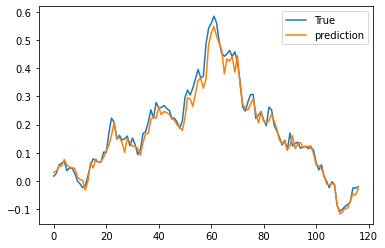

In [22]:
fig = plt.figure(facecolor='white')
ax = fig.add_subplot(1,1,1)
ax.plot(y_test,label='True')
ax.plot(pred, label='prediction')
ax.legend()
plt.show()

In [23]:
# 미래 코인가격을 예측하는 함수
def predictCoin(prices):
    r_price = [] 
    p_price = []
    for v in range(100,0,-1):
        r_price.append(prices[-50-v:-v])
    for i in range(200):
        # 데이터 정규화
        pre_test = []
        normalized_window = [float(p)/float(r_price[i][0])for p in r_price[i]]
        pre_test.append(normalized_window)
        test = np.array(pre_test)
        pre_test = test[:,:]
        pre_test = np.reshape(pre_test, (pre_test.shape[0], pre_test.shape[1],1))
        # 가격 예측 후 원래 데이터셋에 추가(예측 가격은 p_price)
        pre_result = model.predict(pre_test)
        p = pre_result[0]
        p = round(r_price[i][0]*p[0],2)
        p_price.append(p)
        if( i >= 99 ):
            new_price = np.array([])
            new_price = np.append(r_price[i][1:],p)
            r_price.append(new_price)
    return p_price

In [ ]:
predictC = predictCoin(prices)

fig = plt.figure(facecolor='white',figsize=(15,10))
ax = fig.add_subplot(1,1,1)
ax.plot(predictC, label='prediction')
ax.legend()
plt.show()

In [ ]:
predictC